In [ ]:
# Installing yfinance
!pip install yfinance quantstats pyportfolioopt ta

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.0 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2329b5d017cb1b8708416779b9d7b8405a8c8b9b3b7340832b3c350bbf30ca5c
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

Daily Returns: Stock's daily percentage change in price over a single day is called Daily return.

Stock closes on Monday at 100  and  $102 on Tuesday

Daily return: (102-100)/100 = 2%

if stock closes at 98% on Tuesday:

Daily return = (98-100)/100 = -2%

In [ ]:
#Use quantstats for visualizations
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-02-10']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':'2023-02-10']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':'2023-02-10']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':'2023-02-10']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Converting timezone
aapl.index = aapl.index.tz_localize(None)
tsla.index = tsla.index.tz_localize(None)
dis.index = dis.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)




Apple Daily Returns Plot:



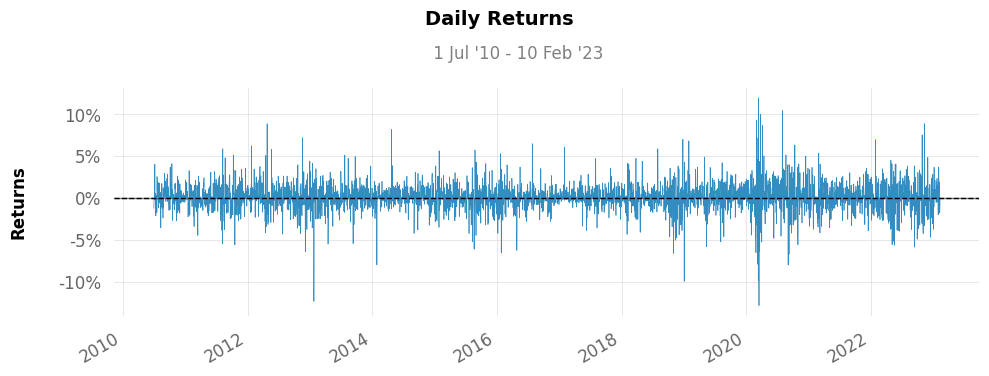






Tesla Inc. Daily Returns Plot:



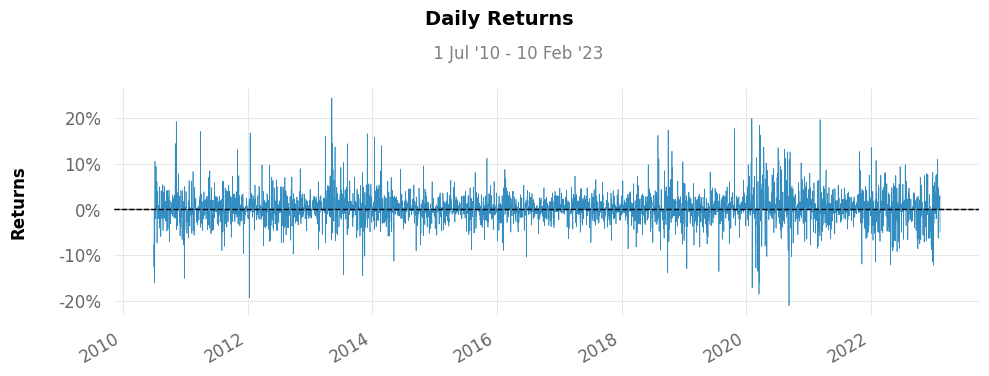






The Walt Disney Company Daily Returns Plot:



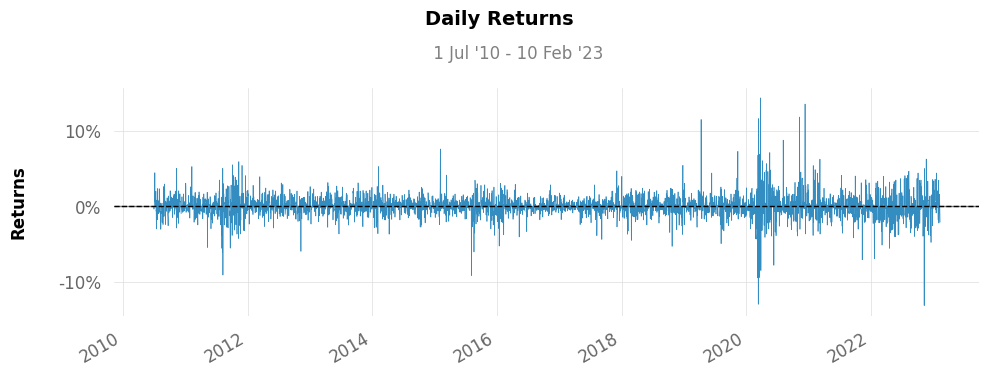






Advances Micro Devices, Inc. Daily Returns Plot:



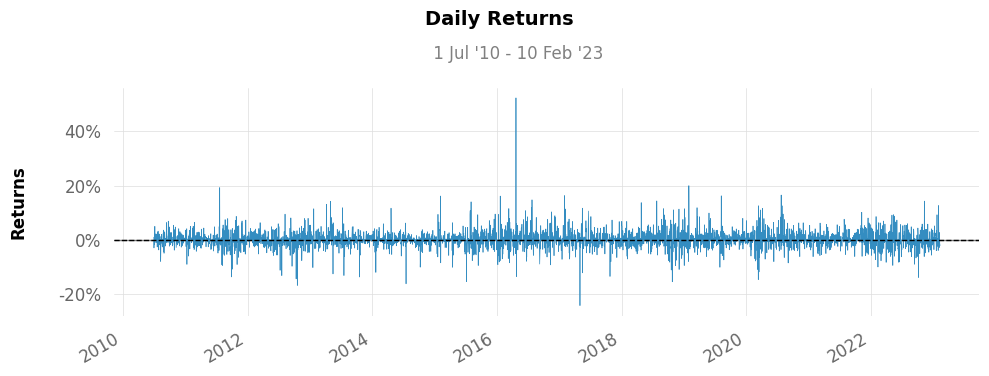

In [ ]:
# Plotting Daily Returns for each stock
print('\n')
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, benchmark=None)
print('\n')
print('\n')
print('\nTesla Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(tsla,  benchmark=None)
print('\n')
print('\n')
print('\nThe Walt Disney Company Daily Returns Plot:\n')
qs.plots.daily_returns(dis,  benchmark=None)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd,  benchmark=None)

The plots above allow us to see an unusual variation in AMD stock prices, an increase of around 40% in its shares by 2016, which may have occurred for various factors, such as surprising earnings reports, increased demand for the company's products, or favorable market conditions. This behavior may indicate high volatility, thus marking it a riskier investment.


On the other hand, Disney's and Apple's stocks seem more stable and predictable investment options at first glance.




Apple Cumulative Returns Plot



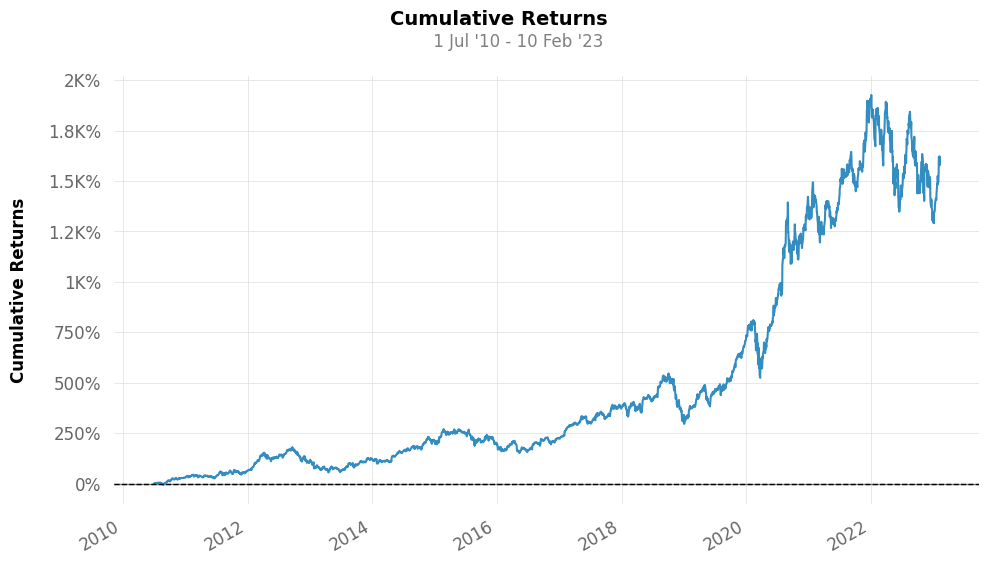






Tesla Inc. Cumulative Returns Plot



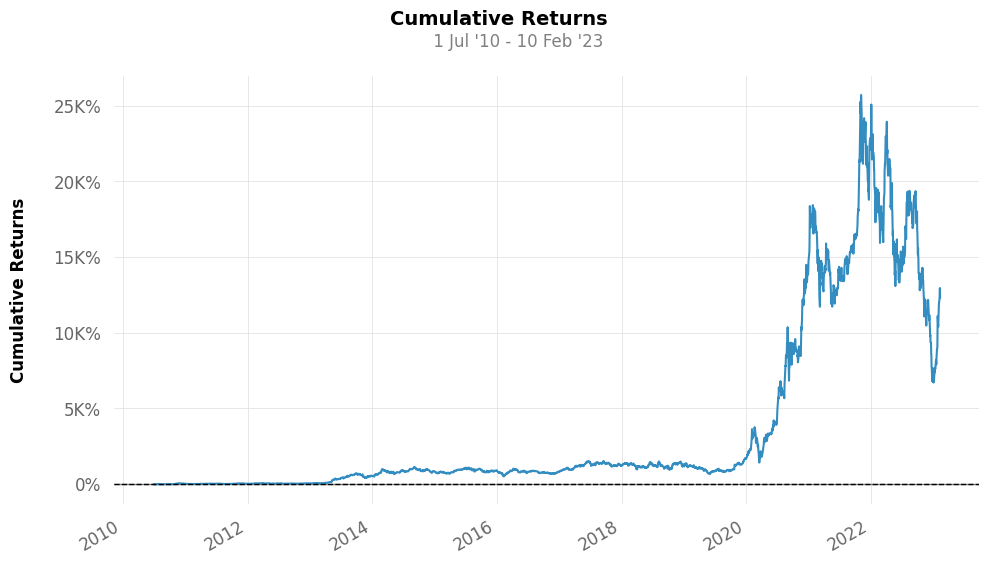






The Walt Disney Company Cumulative Returns Plot



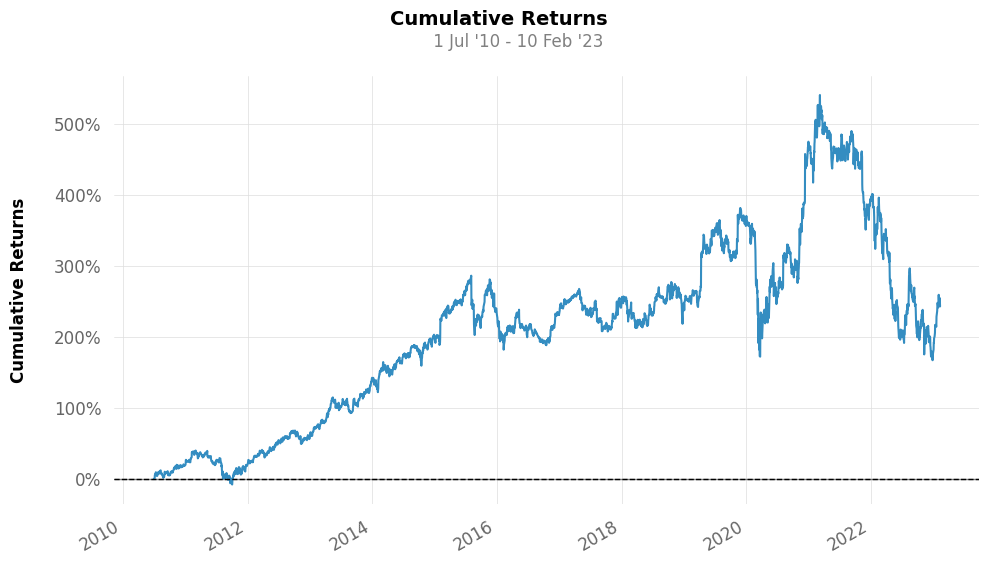






Advances Micro Devices, Inc. Cumulative Returns Plot



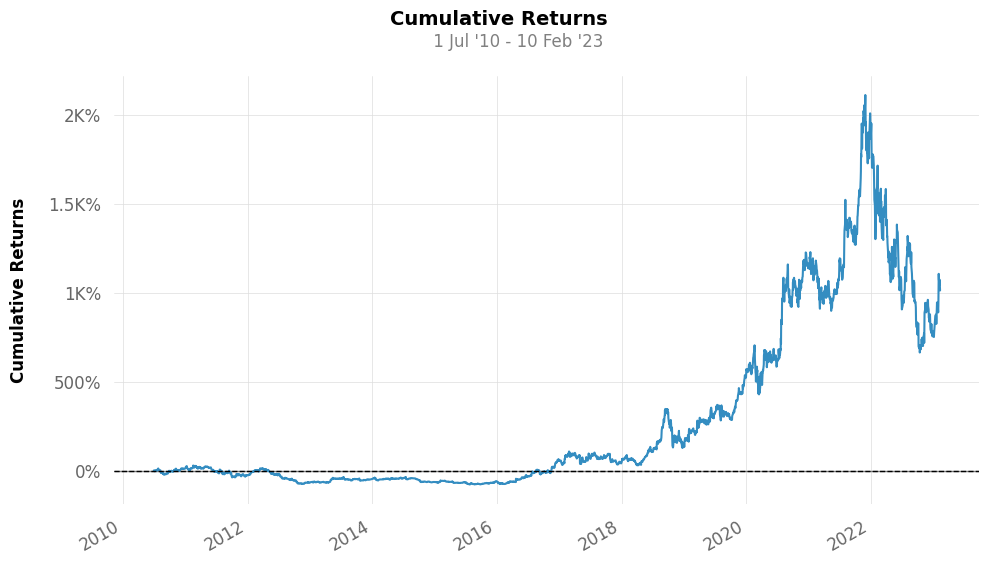

In [ ]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')
print('\nTesla Inc. Cumulative Returns Plot\n')
qs.plots.returns(tsla)
print('\n')
print('\n')
print('\nThe Walt Disney Company Cumulative Returns Plot\n')
qs.plots.returns(dis)
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')
qs.plots.returns(amd)

Histograms: Histograms of daily returns are valuable to help investors to identify patterns, such as the range of daily returns of an asset over a certain period, indicating its level of stability and volatility.


Apple Daily Returns Histogram



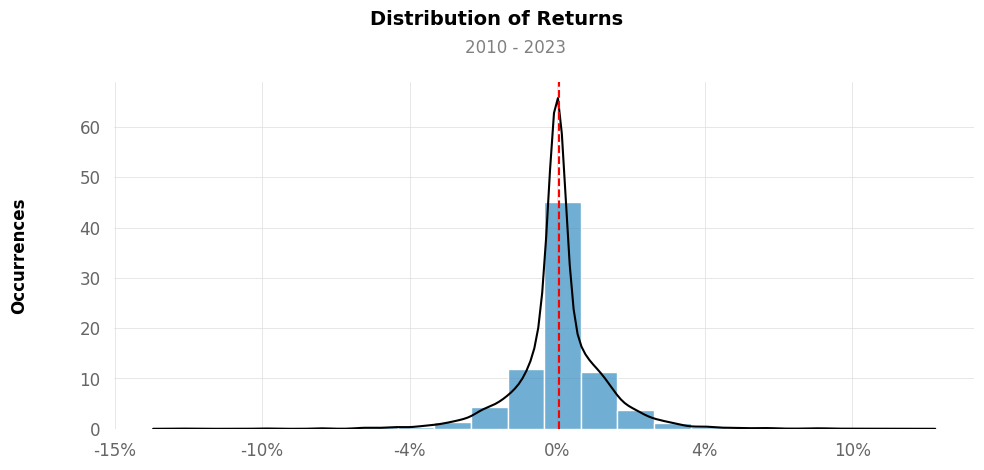


Tesla Inc. Daily Returns Histogram



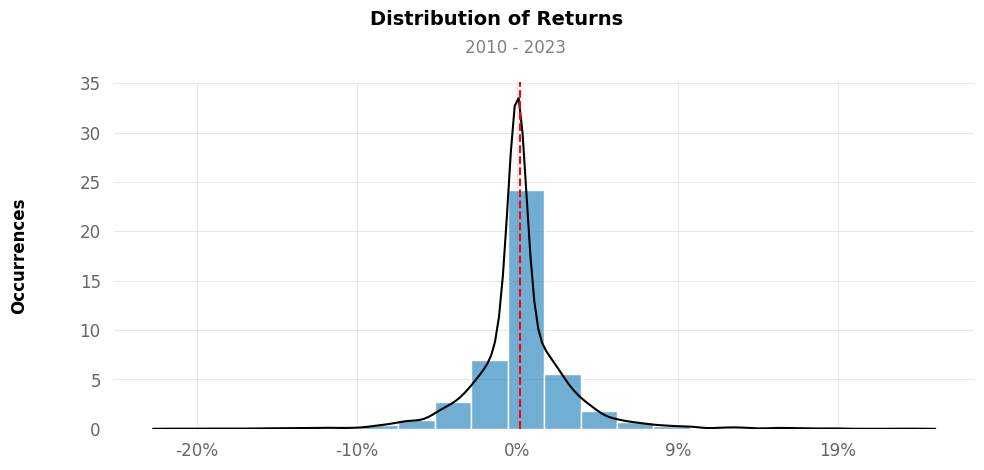


Walt Disney Daily Returns Histogram



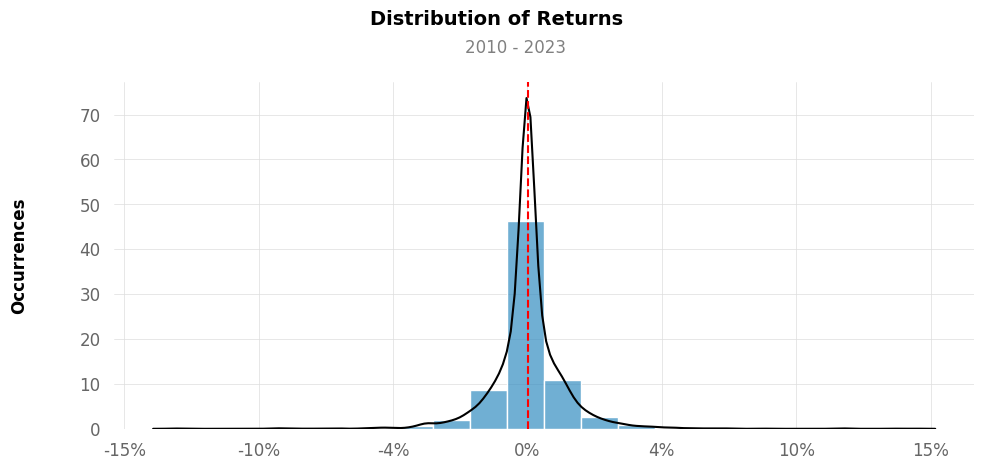


Advances Micro Devices, Inc. Daily Returns Histogram



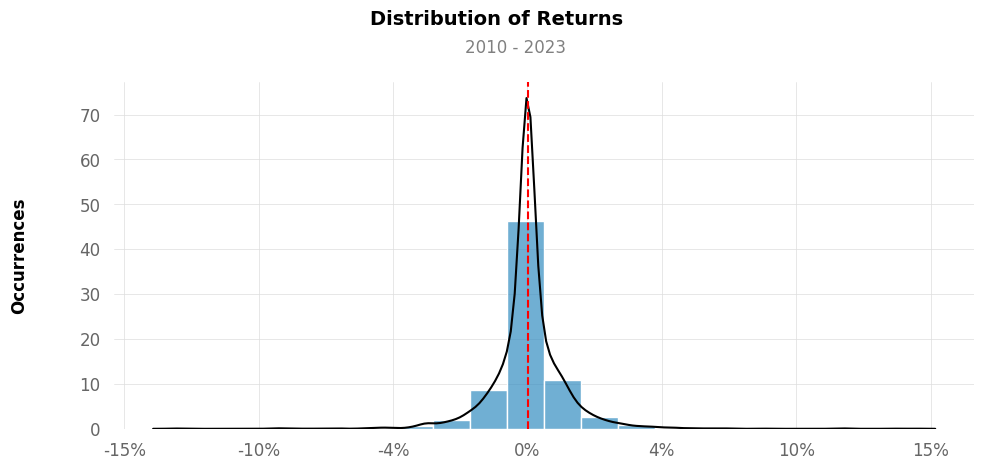

In [ ]:
print("\nApple Daily Returns Histogram\n")
qs.plots.histogram(aapl, resample='D')
print("\nTesla Inc. Daily Returns Histogram\n")
qs.plots.histogram(tsla, resample='D')
print("\nWalt Disney Daily Returns Histogram\n")
qs.plots.histogram(dis, resample='D')
print("\nAdvances Micro Devices, Inc. Daily Returns Histogram\n")
qs.plots.histogram(dis, resample='D')

Most of the daily returns are close to zero in the center of distribution. Some extreme values that are distant from th mean

### Kurtosis

Normal distribution kurtosis: A normal distribution has a kurtosis value of 3. In finance, it’s often referred to as the baseline or "mesokurtic" distribution.

High kurtosis (Leptokurtic): When a stock's return distribution has a kurtosis greater than 3, it is called leptokurtic. This indicates the presence of "fat tails" or more extreme values, suggesting the stock may have a higher probability of experiencing extreme events (large gains or losses). This is often associated with higher risk, as large deviations from the mean are more likely.

Low kurtosis (Platykurtic): If a stock's return distribution has a kurtosis lower than 3, it is called platykurtic. This suggests "thin tails" or fewer extreme values, meaning the returns tend to be more evenly distributed around the mean, with fewer extreme outliers. Such stocks might be viewed as less volatile or lower risk.

In [ ]:
print("Apple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))
print('\n')
print("Tesla's kurtosis: ", qs.stats.kurtosis(tsla).round(2))
print('\n')
print("Walt Disney's kurtosis: ", qs.stats.kurtosis(dis).round(3))
print('\n')
print("Advances Micro Devices' kurtosis: ", qs.stats.kurtosis(amd).round(3))

Apple's kurtosis:  5.25


Tesla's kurtosis:  5.04


Walt Disney's kurtosis:  10.998


Advances Micro Devices' kurtosis:  17.125


### Skewness

Skewness is a metric that quantifies the asymmetry of returns. It reflects the shape of ditribution and determines if its symmetrical, skewed to the left or skewed to the right

On the left, it shows an example of a positively skewed distribution, with a long right tail, indicating a substantial probability of extremely positive daily returns compared to a normal distribution.

On the other hand, a negatively skewed distribution would most likely resemble the distribution on the right, with a long tail representing more frequency of outliers on the negative side of returns.

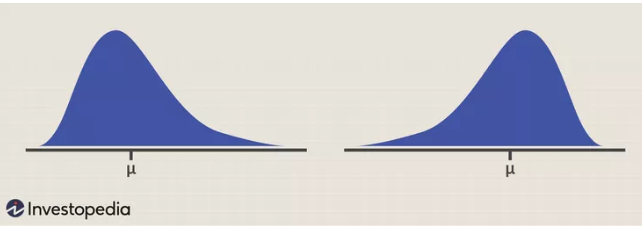


In [ ]:
print('\n')
print("Apple's skewness: ", qs.stats.skew(aapl).round(2))
print('\n')
print("Tesla's skewness: ", qs.stats.skew(tsla).round(2))
print('\n')
print("Walt Disney's skewness: ", qs.stats.skew(dis).round(3))
print('\n')
print("Advances Micro Devices' skewness: ", qs.stats.skew(amd).round(3))



Apple's skewness:  -0.07


Tesla's skewness:  0.33


Walt Disney's skewness:  0.202


Advances Micro Devices' skewness:  1.043


Generally, a value between -0.5 and 0.5 indicates a slight level of skewness, while values below -1 and above 1 are indications of strong asymmetry.


Apple, Tesla, and Disney are just slightly skewed, and Disney's slight skewness can be seen by looking at the range of the x-axis of its histogram, where it is pretty much balanced between -15% and 15%.

### Standard deviation

Standard deviation enables investors to assess the risk level and to compare the volatility of different stocks. For instance, if two assets have similar average returns, but one has a higher standard deviation, it is usually considered a riskier investment.

In [ ]:
# Calculating Standard Deviations
print('\n')
print("Apple's Standard Deviation from 2010 to 2023: ", aapl.std())
print('\n')
print("\nTesla's Standard Deviation from 2010 to 2023: ", tsla.std())
print('\n')
print("\nDisney's Standard Deviation from 2010 to 2023: ", dis.std())
print('\n')
print("\nAMD's Standard Deviation from 2010 to 2023: ", amd.std())



Apple's Standard Deviation from 2010 to 2023:  0.01801470913518934



Tesla's Standard Deviation from 2010 to 2023:  0.036163898010104834



Disney's Standard Deviation from 2010 to 2023:  0.016463663549593995



AMD's Standard Deviation from 2010 to 2023:  0.03600702641706569


### Pairplots and Correlation matrix

Correlation analysis in the stock market allows us for interesting investment strategies. A widely known strategy in the market is called Long-Short, which is the act of buying shares of a company, while selling shares of another company, believing that both assets will have opposite directions in the market. That is, when one goes up, the other goes down.

 it's also crucial to avoid systemic risk, which is described as the risk of the breakdown of an entire system rather than simply the failure of individual parts.

In [ ]:
merged_df = pd.concat([aapl, tsla, dis, amd], axis=1)
merged_df.columns = ['aapl', 'tsla', 'dis', 'amd']
merged_df.head()

,aapl,tsla,dis,amd
Date,,,,
2010-07-01,-0.012126,-0.078473,-0.000317,0.009563
2010-07-02,-0.006198,-0.125683,-0.003493,-0.029770
2010-07-06,0.006844,-0.160937,0.010835,-0.018131
2010-07-07,0.040381,-0.019243,0.044767,0.049716
2010-07-08,-0.002242,0.105064,0.006035,-0.002706


In [ ]:
merged_df.corr()

,aapl,tsla,dis,amd
aapl,1.000000,0.355328,0.415690,0.388159
tsla,0.355328,1.000000,0.291925,0.308214
dis,0.415690,0.291925,1.000000,0.320328
amd,0.388159,0.308214,0.320328,1.000000


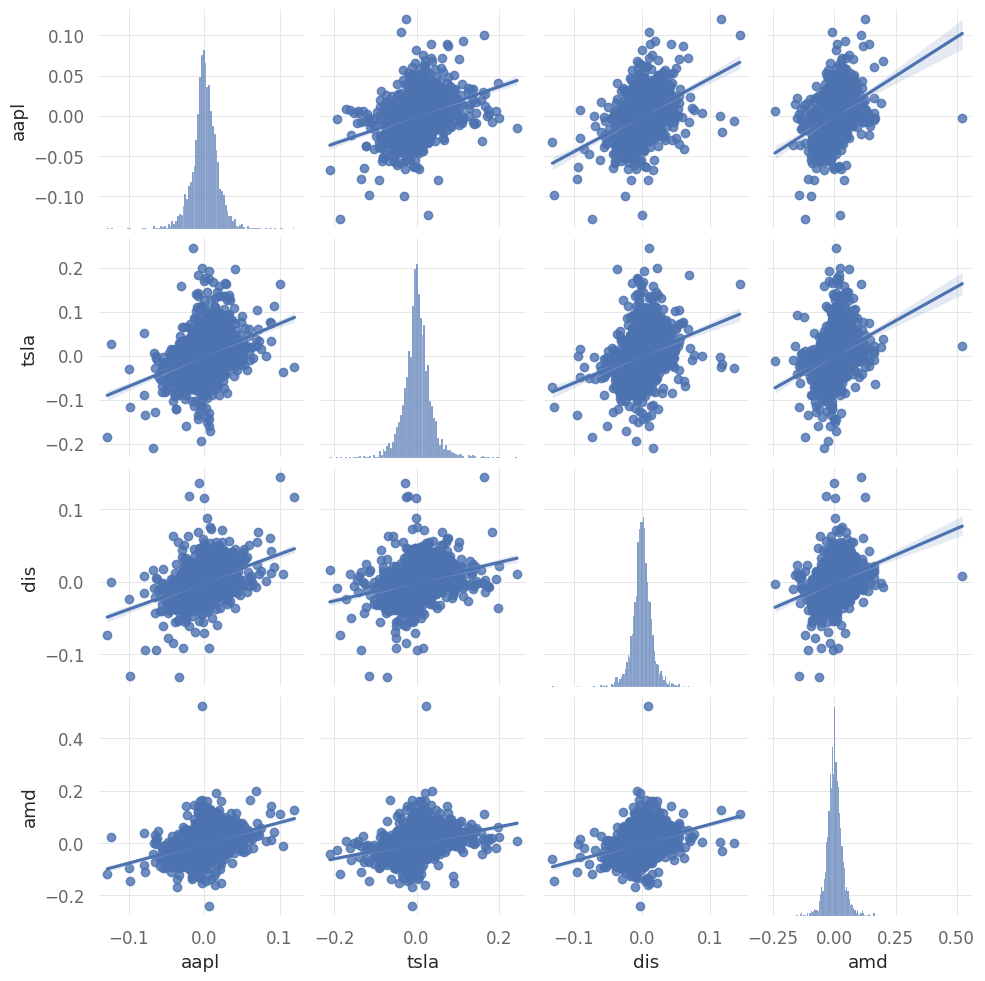

In [ ]:
sns.pairplot(merged_df, kind = 'reg')
plt.show()

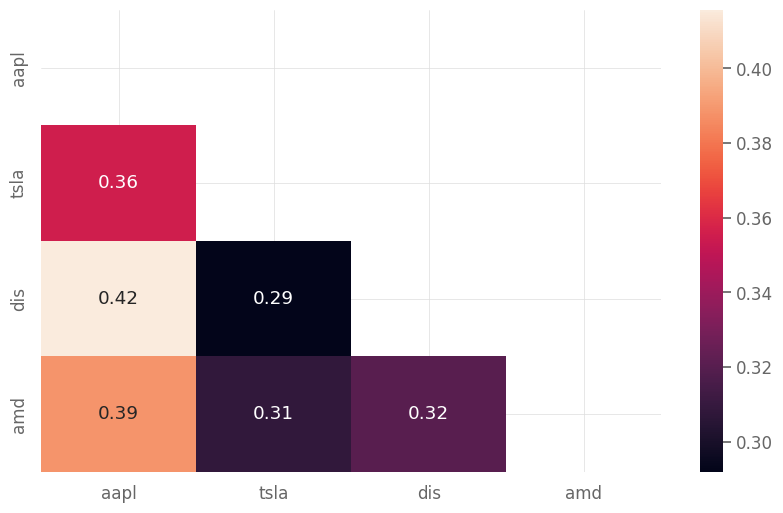

In [ ]:
corr = merged_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, mask = mask)
plt.show()

In the financial market, a hedge is an investment position intended to offset potential losses by investing in assets that may have a negative correlation with the others in a portfolio. Many investors buy gold to serve as protection for riskier investments, such as stocks, and when the market as a whole goes into a bear market, the gold tends to increase in value, limiting potential losses for the overall portfolio.

### Beta and Alpha

Beta and Alpha are two key metrics used in finance to evaluate the performance of a stock relative to the overall market. Beta is a measure of a stock's volatility compared to the market. A Beta of 1 means that the stock is as volatile as the market, a Beta greater than 1 indicates higher volatility than the market, and a Beta less than 1 suggests lower volatility.


Alpha, on the other hand, is a measurement of a stock's excess return relative to its expected performance based on its Beta. A positive Alpha indicates that a stock has outperformed its expected performance based on its Beta, while a negative Alpha suggests underperformance. By analyzing the Beta and Alpha values of stocks, investors can get a better understanding of the risk and potential returns of the stock compared to the market, and make informed investment decisions accordingly.

In [ ]:
#You need s&p500 data to determine Beta and Alpha
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2023-02-10']
sp500.index = sp500.index.tz_localize(None)
sp500

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-07-01,-0.003240
2010-07-02,-0.004662
2010-07-06,0.005359
2010-07-07,0.031331
2010-07-08,0.009413
...,...
2023-02-06,-0.006140
2023-02-07,0.012873
2023-02-08,-0.011081


In [ ]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
dis_no_index = dis.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [ ]:
sp500_no_index

,Close
0,-0.003240
1,-0.004662
2,0.005359
3,0.031331
4,0.009413
...,...
3171,-0.006140
3172,0.012873
3173,-0.011081
3174,-0.008830


We can use the Scikit-Learn's Linear Regression model to extract Beta and Alpha from the analyzed stocks.

In [ ]:
X = sp500_no_index.values.reshape(-1, 1)
y = aapl_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0][0]
alpha = linreg.intercept_[0]

print("Apple's Beta: ", beta)
print("Apple's Alpha: ", alpha)

Apple's Beta:  1.1114275136003788
Apple's Alpha:  0.0004995495135113962


In [ ]:
X = sp500_no_index.values.reshape(-1, 1)
y = tsla_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0][0]
alpha = linreg.intercept_[0]

print("Tesla's Beta: ", beta)
print("Tesla's Alpha: ", alpha)

Apple's Beta:  1.376638423310868
Apple's Alpha:  0.001485562207675323


In [ ]:
# Fitting linear relation among Walt Disney's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = dis_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0][0]
alpha = linreg.intercept_[0]

print("Tesla's Beta: ", beta)
print("Tesla's Alpha: ", alpha)

Apple's Beta:  1.0243837596969114
Apple's Alpha:  1.5014820284030414e-05


In [ ]:
# Fitting linear relation among Walt Disney's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = amd_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
beta = linreg.coef_[0][0]
alpha = linreg.intercept_[0]

print("AMD Beta: ", beta)
print("AMD Alpha: ", alpha)

AMD Beta:  1.60334324532905
AMD Alpha:  0.0006005884423245983


Beta values for all the stocks are greater than 1, meaning that they are more volatile than the benchmark and may offer higher returns, but also come with greater risks. On the other hand, the alpha values for all the stocks are small, close to zero, suggesting that there is little difference between the expected returns and the risk-adjusted returns.

### Sharpe's Ratio

The Sharpe ratio is a measure of the risk-adjusted return of an investment. It is calculated by dividing the average excess return of the investment over the standard deviation of the returns, as shown by the following equation:

A higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio. In general, a Sharpe ratio greater than 1 is considered good, while a Sharpe ratio less than 1 is considered poor. A Sharpe ratio of 1 means that the investment's average return is equal to the risk-free rate of return.

In [ ]:
print('\n')
print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))
print('\n')
print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))
print('\n')
print("Sharpe Ratio for DIS: ", qs.stats.sharpe(dis).round(2))
print('\n')
print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))



Sharpe Ratio for AAPL:  0.93


Sharpe Ratio for TSLA:  0.95


Sharpe Ratio for DIS:  0.5


Sharpe Ratio for AMD:  0.62
